## Exploratory Data Analysis

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data set

bike_sharing_data = pd.read_csv("day.csv")

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#data set length
bike_sharing_data.shape

# There are 730 records with 16 columns

(730, 16)

In [5]:
# dataset type and check for null values
bike_sharing_data.info()

# No null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check for duplicate records

bike_sharing_data.nunique()

## None of the columns has single value 

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
# check dataset range
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation Steps:

1) Convert categorical variables with numeric codes (season, weathersit, day and month) into categorical string values for better model interpretation.

2) Retain the yr column as it indicates a significant trend in bike-sharing demand between the years 2018 (coded as 0) and 2019 (coded as 1).

3) Drop unnecessary columns that won't be used in the model (e.g., instant, dteday, casual, registered), as we're focusing on predicting the total count (cnt).

In [8]:
# identify categorical variables
categorical_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# identify numeric variables
numeric_vars = ['temp', 'atemp','hum','windspeed','cnt']

In [9]:
# Data Preparation

# Convert to categorical variables with more descriptive values
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist_Cloudy', 3: 'Light_Snow_Rain', 4: 'Heavy_Rain_Ice_Pellets'}
day_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
month_mapping = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'}

bike_sharing_data['season'] = bike_sharing_data['season'].map(season_mapping)
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map(weather_mapping)
bike_sharing_data['mnth'] = bike_sharing_data['mnth'].map(month_mapping)
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map(day_mapping)

# Convert dtype to categorical type
bike_sharing_data[categorical_vars] = bike_sharing_data[categorical_vars].astype('category')

# Drop unnecessary columns
bike_sharing_data = bike_sharing_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Checking the prepared data
bike_sharing_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Winter,0,jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Winter,0,jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Winter,0,jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Winter,0,jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Winter,0,jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Univariate Analysis

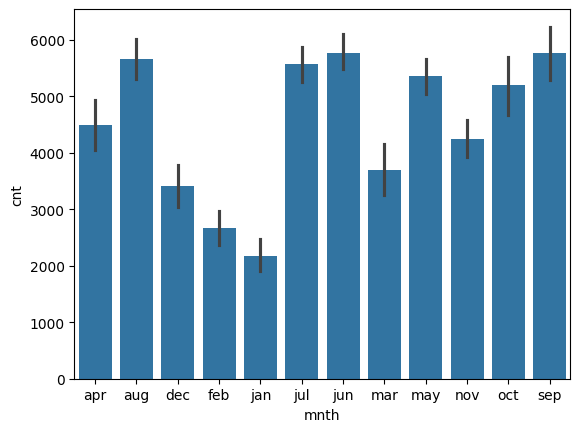

In [10]:
sns.barplot(x = 'mnth', y = 'cnt', data = bike_sharing_data)
plt.show()

Note: We could see from the graph that begining of the year will start with less demand and demand will start increasing and reaches peak during mid year and falls back again at the end of the year

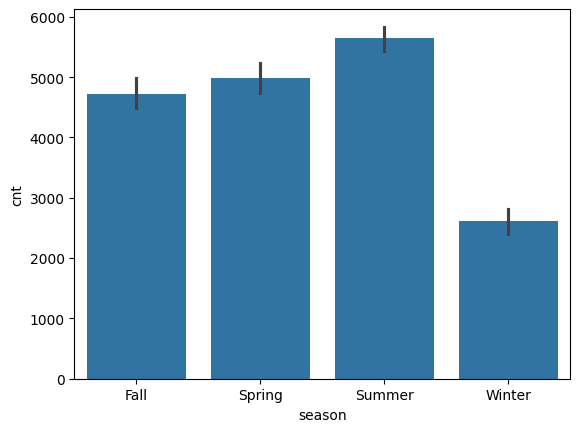

In [11]:
sns.barplot(x = 'season', y = 'cnt', data = bike_sharing_data)
plt.show()

Note: Looks like demand is more in Summer and less in winter.

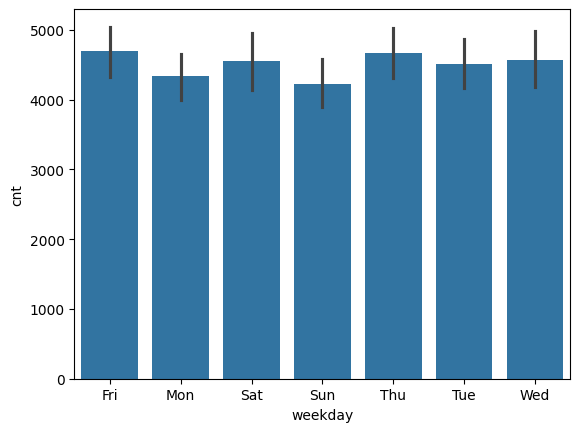

In [12]:
sns.barplot(x = 'weekday', y = 'cnt', data = bike_sharing_data)
plt.show()

Note: Looks like no pattern can be found whether it is a weekday or weekend

## Bivariate Analysis

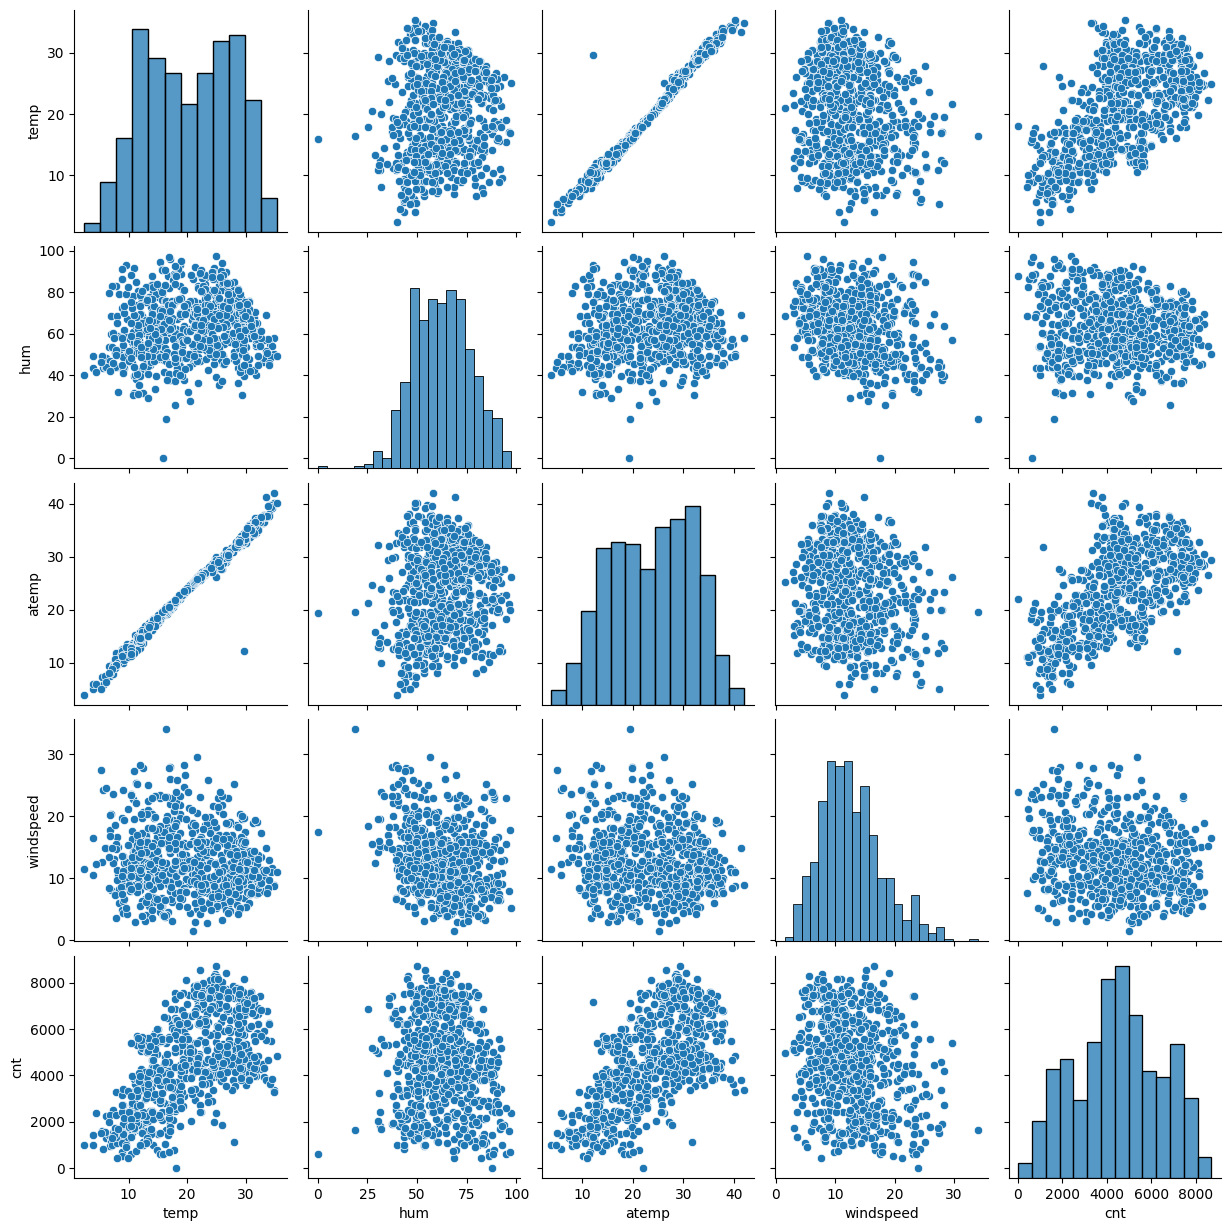

In [13]:
sns.pairplot(bike_sharing_data[['temp','hum','atemp','windspeed','cnt']])
plt.show()

Note: looks like temp and atemp are similar to each other. We can consider only temp for model prediction

In [14]:
## Dropping aTemp column

bike_sharing_data.columns
bike_sharing_data.drop(['atemp'],axis=1,inplace=True)

## Multivariate Analysis

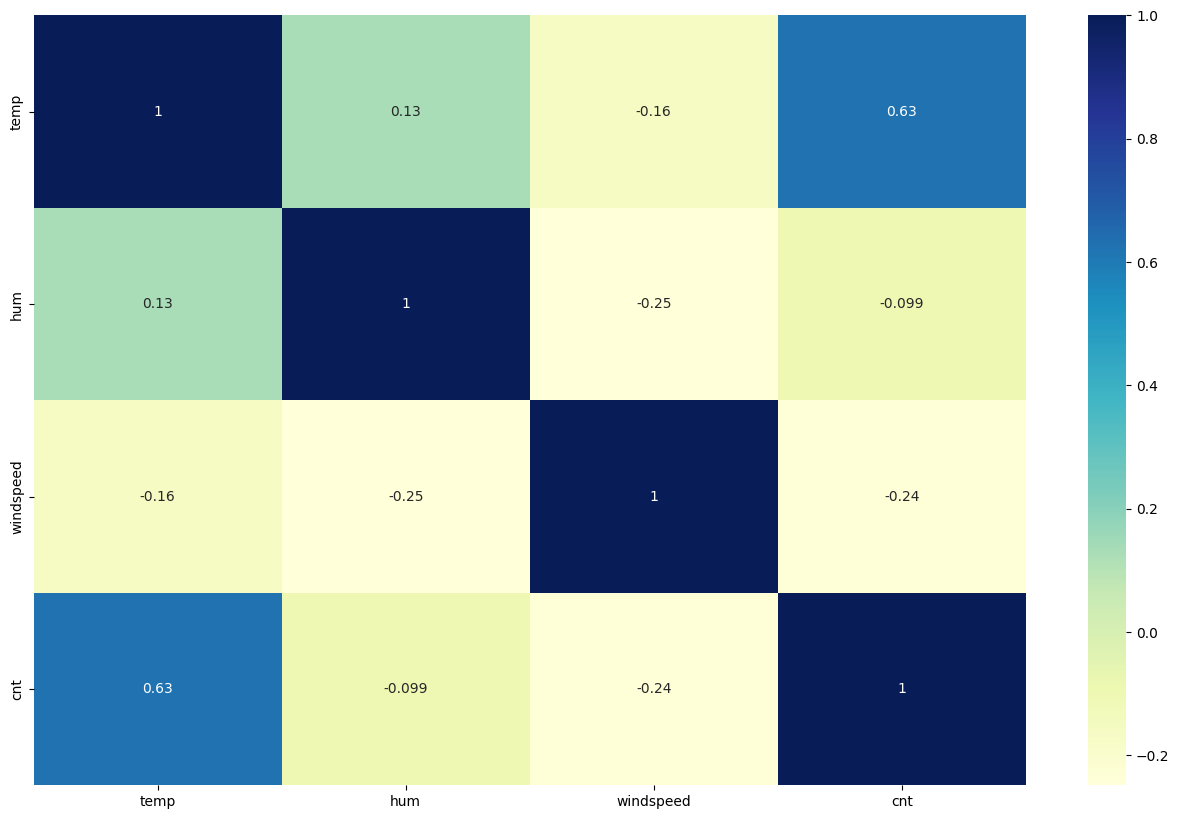

In [15]:
## plotting heatmap

# Exclude categorical variables
numerical_data = bike_sharing_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16,10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='YlGnBu')
plt.show()


Note: cnt as positive correlation with  temp and negative correlation with windspeed and hum

## Model Building and evaluation

In [16]:
# Convert categorical variables into dummy/indicator variables
bike_sharing_data = pd.get_dummies(bike_sharing_data, drop_first=True)

In [17]:
# Splitting the dataset into the predictors and target variable
y = bike_sharing_data['cnt']
X = bike_sharing_data.drop(['cnt'], axis=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a linear regression model for use in feature selection
lm = LinearRegression()

# Selecting 10 features with RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE
col = X.columns[rfe.support_]

In [23]:
col

Index(['temp', 'hum', 'windspeed', 'season_Summer', 'season_Winter', 'yr_1',
       'mnth_oct', 'mnth_sep', 'holiday_1', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [26]:
import statsmodels.api as sm

# Reset the indices of y_train
y_train = y_train.reset_index(drop=True)

# Filter the training data for selected features
X_train_selected = pd.DataFrame(X_train, columns=X.columns).loc[:, col]

# Adding a constant to the model, because statsmodels' OLS doesn't include it by default
X_train_sm = sm.add_constant(X_train_selected)

# Fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()

# Viewing the summary of the model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          7.91e-184
Time:                        16:12:03   Log-Likelihood:                -4143.2
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     500   BIC:                             8355.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [28]:
from sklearn.metrics import r2_score

# Reset the indices of y_test if necessary
y_test = y_test.reset_index(drop=True)

# Prepare X_test similarly to X_train
X_test_selected = pd.DataFrame(X_test, columns=X.columns)[col].reset_index(drop=True)
X_test_sm = sm.add_constant(X_test_selected)

# Making predictions
y_pred = lr_model.predict(X_test_sm)

# Calculating the R-squared value
r2_test = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2_test}')

R-squared on Test Set: 0.826120546994689


## Residual Analysis

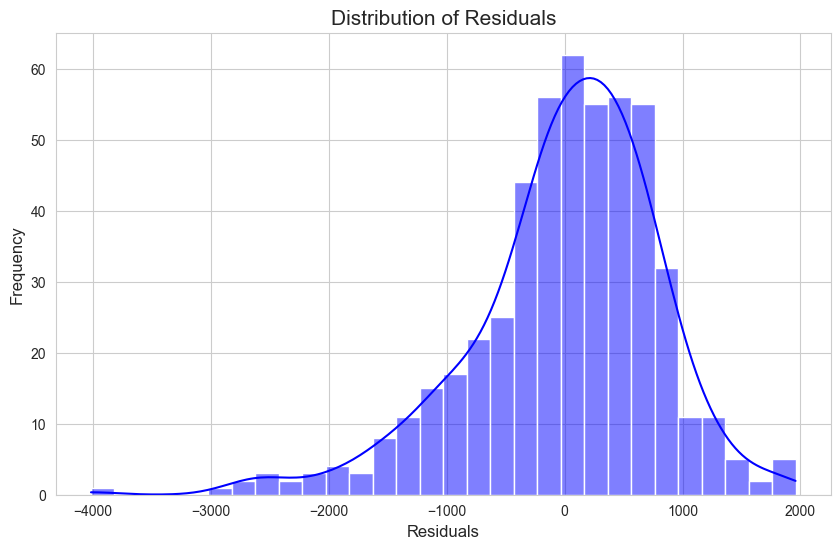

In [29]:
# Calculate the predictions on the training set
y_train_pred = lr_model.predict(X_train_sm)

# Calculate the residuals
residuals = y_train - y_train_pred

# Setting the aesthetics for the plots
sns.set_style('whitegrid')

# Plotting the histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

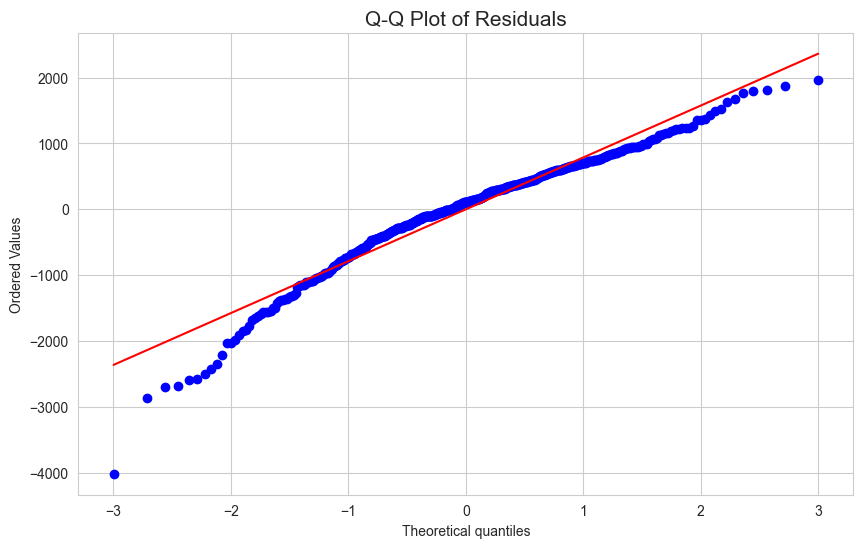

In [31]:
import scipy.stats as stats

# Plotting the Q-Q plot of the residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=15)
plt.show()

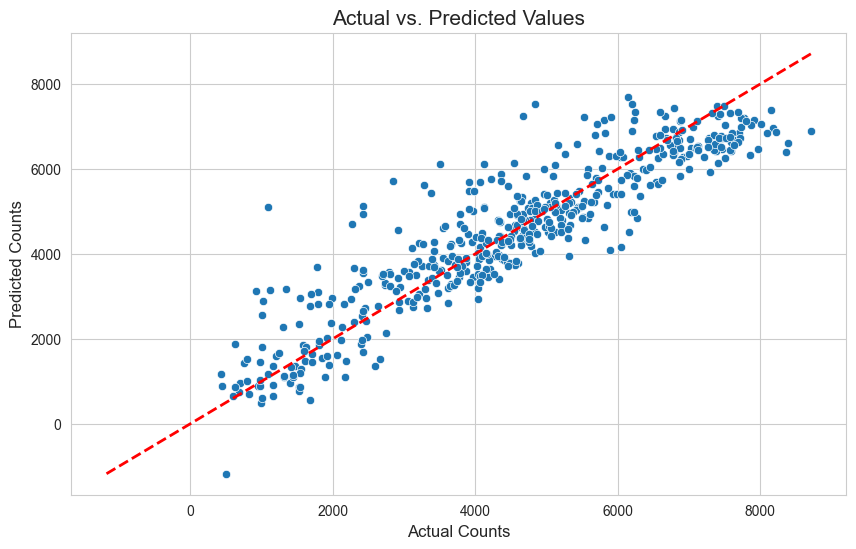

In [33]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set_style('whitegrid')

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title('Actual vs. Predicted Values', fontsize=15)
plt.xlabel('Actual Counts', fontsize=12)
plt.ylabel('Predicted Counts', fontsize=12)

# Plotting the line of perfect predictions
max_val = max(y_train.max(), y_train_pred.max())
min_val = min(y_train.min(), y_train_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--')

plt.show()
